In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap


import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
import plotly.figure_factory as ff
from warnings import filterwarnings
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score, f1_score
from sklearn.model_selection import train_test_split,StratifiedKFold, GridSearchCV
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier,VotingClassifier
from sklearn.preprocessing import minmax_scale, MinMaxScaler, LabelEncoder, StandardScaler
from sklearn.metrics.pairwise import cosine_similarity
from sklearn import preprocessing
import joblib

from tensorflow.keras.models import load_model
#from xgboost import XGBClassifier
#from catboost import CatBoostClassifier
import librosa
import librosa.display
from IPython.display import Audio
import tensorflow as tf
#import tensorflow.keras.layers as L
#from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
#import tensorflow_addons as tfa
import time

import os
import random 
from sklearn.cluster import KMeans

#visualizing the model
# import netron
# from ann_visualizer.visualize import ann_viz
# from graphviz import Source



In [2]:
#Load Data
GENERAL_PATH='/kaggle/input/gtzan-dataset-music-genre-classification/Data'
df = pd.read_csv(f'{GENERAL_PATH}/features_30_sec.csv')

In [3]:
df.head(10)

,filename,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,...,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
0,blues.00000.wav,661794,0.350088,0.088757,0.130228,0.002827,1784.165850,1.297741e+05,2002.449060,85882.761315,...,52.420910,-1.690215,36.524071,-0.408979,41.597103,-2.303523,55.062923,1.221291,46.936035,blues
1,blues.00001.wav,661794,0.340914,0.094980,0.095948,0.002373,1530.176679,3.758501e+05,2039.036516,213843.755497,...,55.356403,-0.731125,60.314529,0.295073,48.120598,-0.283518,51.106190,0.531217,45.786282,blues
2,blues.00002.wav,661794,0.363637,0.085275,0.175570,0.002746,1552.811865,1.564676e+05,1747.702312,76254.192257,...,40.598766,-7.729093,47.639427,-1.816407,52.382141,-3.439720,46.639660,-2.231258,30.573025,blues
3,blues.00003.wav,661794,0.404785,0.093999,0.141093,0.006346,1070.106615,1.843559e+05,1596.412872,166441.494769,...,44.427753,-3.319597,50.206673,0.636965,37.319130,-0.619121,37.259739,-3.407448,31.949339,blues
4,blues.00004.wav,661794,0.308526,0.087841,0.091529,0.002303,1835.004266,3.433999e+05,1748.172116,88445.209036,...,86.099236,-5.454034,75.269707,-0.916874,53.613918,-4.404827,62.910812,-11.703234,55.195160,blues
5,blues.00005.wav,661794,0.302456,0.087532,0.103494,0.003981,1831.993940,1.030482e+06,1729.653287,201910.508633,...,72.549225,-1.838263,68.702026,-2.783800,42.447453,-3.047909,39.808784,-8.109991,46.311005,blues
6,blues.00006.wav,661794,0.291328,0.093981,0.141874,0.008803,1459.366472,4.378594e+05,1389.009131,185023.239545,...,83.248245,-10.913176,56.902153,-6.971336,38.231800,-3.436505,48.235741,-6.483466,70.170364,blues
7,blues.00007.wav,661794,0.307955,0.092903,0.131822,0.005531,1451.667066,4.495682e+05,1577.270941,168211.938804,...,70.438438,-10.568935,52.090893,-10.784515,60.461330,-4.690678,65.547516,-8.630722,56.401436,blues
8,blues.00008.wav,661794,0.408879,0.086512,0.142416,0.001507,1719.368948,1.632828e+05,2031.740381,105542.718193,...,50.563751,-7.041824,28.894934,2.695248,36.889568,3.412305,33.698597,-2.715692,36.418430,blues
9,blues.00009.wav,661794,0.273950,0.092316,0.081314,0.004347,1817.150863,2.982361e+05,1973.773306,114070.112591,...,59.314602,-1.916804,58.418438,-2.292661,83.205231,2.881967,77.082222,-4.235203,91.468811,blues


In [4]:
df.isnull().values.any()

False

In [5]:
df.shape
df.label.value_counts().reset_index()

,label,count
0,blues,100
1,classical,100
2,country,100
3,disco,100
4,hiphop,100
5,jazz,100
6,metal,100
7,pop,100
8,reggae,100
9,rock,100


In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
length,1000.0,6.620308e+05,1.784074e+03,6.600000e+05,661504.000000,6.617940e+05,6.617940e+05,6.758080e+05
chroma_stft_mean,1000.0,3.786817e-01,8.170489e-02,1.719392e-01,0.319562,3.831479e-01,4.359417e-01,6.636847e-01
chroma_stft_var,1000.0,8.633982e-02,7.735298e-03,4.455525e-02,0.082298,8.661463e-02,9.125551e-02,1.081115e-01
rms_mean,1000.0,1.309297e-01,6.568311e-02,5.276444e-03,0.086657,1.224431e-01,1.756822e-01,3.979734e-01
rms_var,1000.0,3.051399e-03,3.634500e-03,4.294372e-06,0.000942,1.816440e-03,3.577055e-03,2.767948e-02
spectral_centroid_mean,1000.0,2.201781e+03,7.159606e+02,5.700404e+02,1627.697311,2.209263e+03,2.691295e+03,4.435244e+03
spectral_centroid_var,1000.0,4.696916e+05,4.008995e+05,7.911251e+03,184350.530174,3.384862e+05,6.121479e+05,3.036843e+06
spectral_bandwidth_mean,1000.0,2.242541e+03,5.263165e+02,8.980662e+02,1907.240605,2.221393e+03,2.578470e+03,3.509646e+03
spectral_bandwidth_var,1000.0,1.370792e+05,9.645567e+04,1.078719e+04,67376.554428,1.119775e+05,1.823716e+05,6.947848e+05
rolloff_mean,1000.0,4.571549e+03,1.574792e+03,7.491406e+02,3380.069642,4.658524e+03,5.533810e+03,8.677673e+03


In [7]:
#Unique generes
genres=df['label'].unique()
print(genres)

['blues' 'classical' 'country' 'disco' 'hiphop' 'jazz' 'metal' 'pop'
 'reggae' 'rock']


In [8]:
#Dictionary with file names for each genre 
visualize_audio_path = {}
for genre in genres:
    audio_files = [file for file in os.listdir(f'{GENERAL_PATH}/genres_original/{genre}') if file.endswith('.wav')]
    visualize_audio_path[genre] = audio_files

print(type(visualize_audio_path))
visualize_audio_path['blues'].sort()


<class 'dict'>


In [9]:
# Random selection of one file from each genre
random_audio_selection = {}
for genre, files in visualize_audio_path.items():
    random_audio = random.choice(files)
    random_audio_selection[genre] = random_audio

random_audio_selection

{'blues': 'blues.00047.wav',
 'classical': 'classical.00072.wav',
 'country': 'country.00015.wav',
 'disco': 'disco.00083.wav',
 'hiphop': 'hiphop.00028.wav',
 'jazz': 'jazz.00010.wav',
 'metal': 'metal.00042.wav',
 'pop': 'pop.00046.wav',
 'reggae': 'reggae.00018.wav',
 'rock': 'rock.00034.wav'}

In [10]:
#audio
audios={}
sample_rates={}
for audio in random_audio_selection.keys():
    audio_path=f'{GENERAL_PATH}/genres_original/{audio}/{random_audio_selection[audio]}'
    data,sr=librosa.load(audio_path,sr=45600)
    audios[audio]=data
    sample_rates[f'{audio}:sr']=sr

<h2>Audio Samples for Each Genre<h2>

In [11]:
#dodanie kolorow do kazdego z gatunkow muzycznych 
colors = {
    'blues': '#1F77B4',
    'classical': '#FF7F0E',
    'country': '#2CA02C',
    'disco': '#D62728',
    'hiphop': '#9467BD',
    'jazz': '#8C564B',
    'metal': '#E377C2',
    'pop': '#7F7F7F',
    'reggae': '#BCBD22',
    'rock': '#17BECF'
}

<h2>Visualizing<h2>

In [12]:
# for audio in audios.keys():
#     plt.figure(figsize=(12,4))
#     plt.title(f'Waveplot for {audio} music genre sample',size=15)
#     librosa.display.waveshow(audios[audio],color=colors[audio])
#     print('\n')
#     plt.show()

<h2>Short-Time Fourier Transform Plots<h2>

In [13]:
# for audio in zip(audios.keys(),sample_rates.keys()):
#     stft=librosa.stft(audios[audio[0]])
#     plt.figure(figsize=(12,4))
#     plt.title(f'Short-Time Fourier Transform plot for {audio[0]} music genre sample',size=15)
#     librosa.display.specshow(stft,sr=sample_rates[audio[1]],x_axis='time',y_axis='hz')
#     plt.colorbar()

<h2>Spectograms<h2>

In [14]:
# for audio in zip(audios.keys(),sample_rates.keys()):
#     stft=librosa.stft(audios[audio[0]])
#     stft_db=librosa.amplitude_to_db(abs(stft))
#     plt.figure(figsize=(12,4))
#     plt.title(f'Spectogram plot for {audio[0]} music genre sample',size=10)
#     librosa.display.specshow(stft_db,sr=sample_rates[audio[1]],x_axis='time',y_axis='hz')
#     plt.colorbar()

<h2>Spectral Rolloff Plots<h2>


In [15]:
# for audio in zip(audios.keys(), sample_rates.keys()):
#     spectral_rolloff = librosa.feature.spectral_rolloff(y=audios[audio[0]] + 0.01, sr=sample_rates[audio[1]])[0]
#     plt.figure(figsize=(12, 4))
#     plt.title(f'Spectral Rolloff plot for {audio[0]} music genre sample', size=15)
#     plt.plot(spectral_rolloff, color=colors[audio[0]])
#     plt.xlabel('Frame')
#     plt.ylabel('Spectral Rolloff')
#     plt.show()

<h1>Principal Component Analysis and Plotting<h1>

In [16]:
mscaler=MinMaxScaler()

# Data Standardizing
scaler = StandardScaler()

In [17]:
# Data preparation
df_ = df.iloc[:, 1:]
X = df_.loc[:, df_.columns != 'label']
y = df_['label']
cols = X.columns

# print(X.iloc[1:])

# Data Standardizing
scaler = StandardScaler()

X_scaled = scaler.fit_transform(X)

# PCA analysis with 4 principal components
n_components = 4  # Wybór liczby głównych składowych
pca = PCA(n_components=n_components)
principal_components = pca.fit_transform(X_scaled)
principal_df = pd.DataFrame(principal_components, columns=[f'pc{i}' for i in range(1, n_components + 1)])

# Data Concatination
f_df = pd.concat([principal_df, y], axis=1)

# Chart
fig = px.scatter_3d(  # Używamy scatter_3d do wykresu 3D
    f_df,
    x='pc1',
    y='pc2',
    z='pc3',  # Wybieramy trzecią główną składową dla osi z
    color='label',
    symbol='label',
    title='Principal Component Analysis for Genres (3D)',
    labels={'pc1': 'Principal Component 1', 'pc2': 'Principal Component 2', 'pc3': 'Principal Component 3', 'label': 'Genres'},
    width=1000,
    height=600
)
fig.update_traces(marker=dict(size=3))
fig.update_layout(title_x=0.5, font=dict(family='Arial, monospace', size=18, color='#6227D7'))

# Displaying a 3D plot using the Plotly library
fig.show()

In [18]:
df.head()

,filename,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,...,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
0,blues.00000.wav,661794,0.350088,0.088757,0.130228,0.002827,1784.165850,129774.064525,2002.449060,85882.761315,...,52.420910,-1.690215,36.524071,-0.408979,41.597103,-2.303523,55.062923,1.221291,46.936035,blues
1,blues.00001.wav,661794,0.340914,0.094980,0.095948,0.002373,1530.176679,375850.073649,2039.036516,213843.755497,...,55.356403,-0.731125,60.314529,0.295073,48.120598,-0.283518,51.106190,0.531217,45.786282,blues
2,blues.00002.wav,661794,0.363637,0.085275,0.175570,0.002746,1552.811865,156467.643368,1747.702312,76254.192257,...,40.598766,-7.729093,47.639427,-1.816407,52.382141,-3.439720,46.639660,-2.231258,30.573025,blues
3,blues.00003.wav,661794,0.404785,0.093999,0.141093,0.006346,1070.106615,184355.942417,1596.412872,166441.494769,...,44.427753,-3.319597,50.206673,0.636965,37.319130,-0.619121,37.259739,-3.407448,31.949339,blues
4,blues.00004.wav,661794,0.308526,0.087841,0.091529,0.002303,1835.004266,343399.939274,1748.172116,88445.209036,...,86.099236,-5.454034,75.269707,-0.916874,53.613918,-4.404827,62.910812,-11.703234,55.195160,blues


<h1>Kaiser Criterium<h1>

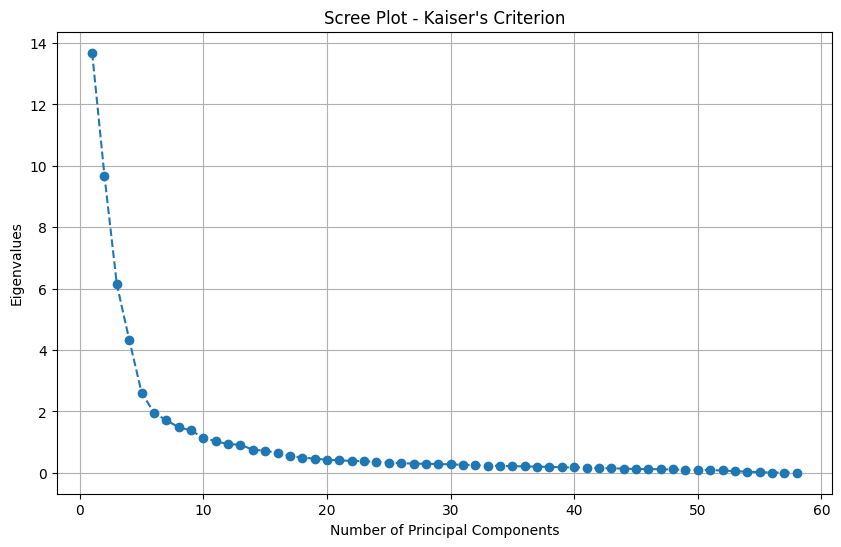

Cumulative Explained Variance Ratio:
PC1: 0.2357
PC2: 0.4022
PC3: 0.5079
PC4: 0.5826
PC5: 0.6276
PC6: 0.6614
PC7: 0.6908
PC8: 0.7164
PC9: 0.7402
PC10: 0.7598
PC11: 0.7775
PC12: 0.7936
PC13: 0.8093
PC14: 0.8222
PC15: 0.8347
PC16: 0.8458
PC17: 0.8553
PC18: 0.8639
PC19: 0.8718
PC20: 0.8791
PC21: 0.8861
PC22: 0.8927
PC23: 0.8992
PC24: 0.9054
PC25: 0.9111
PC26: 0.9165
PC27: 0.9216
PC28: 0.9267
PC29: 0.9316
PC30: 0.9364
PC31: 0.9409
PC32: 0.9451
PC33: 0.9492
PC34: 0.9531
PC35: 0.9568
PC36: 0.9604
PC37: 0.9638
PC38: 0.9672
PC39: 0.9703
PC40: 0.9733
PC41: 0.9762
PC42: 0.9789
PC43: 0.9814
PC44: 0.9837
PC45: 0.9859
PC46: 0.9879
PC47: 0.9900
PC48: 0.9918
PC49: 0.9935
PC50: 0.9950
PC51: 0.9965
PC52: 0.9978
PC53: 0.9987
PC54: 0.9993
PC55: 0.9997
PC56: 0.9999
PC57: 1.0000
PC58: 1.0000


In [19]:

df_ = df.iloc[:, 1:]
X = df_.loc[:, df_.columns != 'label']
y = df_['label']
cols = X.columns

# StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# PCA
pca = PCA()
pca.fit(X_scaled)


eigenvalues = pca.explained_variance_

# Eigenvalue scatterplot graph
plt.figure(figsize=(10, 6))
plt.plot(np.arange(1, len(eigenvalues) + 1), eigenvalues, marker='o', linestyle='--')
plt.title("Scree Plot - Kaiser's Criterion")
plt.xlabel("Number of Principal Components")
plt.ylabel("Eigenvalues")
plt.grid(True)
plt.show()

# Calculation of the cumulative explained variance
cumulative_variance_ratio = np.cumsum(pca.explained_variance_ratio_)

# Display of cumulative variance explained
print("Cumulative Explained Variance Ratio:")
for i, ratio in enumerate(cumulative_variance_ratio, start=1):
    print(f"PC{i}: {ratio:.4f}")

<h1>Preaparing for Training <h1>

In [20]:
import pandas as pd

# Loading data
data_path = '/kaggle/input/gtzan-dataset-music-genre-classification/Data/features_3_sec.csv'
data = pd.read_csv(data_path)

# WDisplaying the first rows of data
# data.sample(5)
# data.columns
# data[0]
# data.iloc[1:]

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Dividing data into features and labels
X = data.drop(['filename', 'label','length','perceptr_mean','perceptr_var','harmony_mean','harmony_var'], axis=1)
y = data['label']
print(X)
# Label encoding 
encoder = LabelEncoder()
y = encoder.fit_transform(y)

# Feature normalization
scaler = StandardScaler()
X = scaler.fit_transform(X.values)

# Division into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

      chroma_stft_mean  chroma_stft_var  rms_mean   rms_var  \
0             0.335406         0.091048  0.130405  0.003521   
1             0.343065         0.086147  0.112699  0.001450   
2             0.346815         0.092243  0.132003  0.004620   
3             0.363639         0.086856  0.132565  0.002448   
4             0.335579         0.088129  0.143289  0.001701   
...                ...              ...       ...       ...   
9985          0.349126         0.080515  0.050019  0.000097   
9986          0.372564         0.082626  0.057897  0.000088   
9987          0.347481         0.089019  0.052403  0.000701   
9988          0.387527         0.084815  0.066430  0.000320   
9989          0.369293         0.086759  0.050524  0.000067   

      spectral_centroid_mean  spectral_centroid_var  spectral_bandwidth_mean  \
0                1773.065032          167541.630869              1972.744388   
1                1816.693777           90525.690866              2010.051501   
2  

((7992, 53), (1998, 53), (7992,), (1998,))

<h1>Random forest<h1>

In [22]:
from sklearn.ensemble import RandomForestClassifier

# Tworzenie modelu Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Trenowanie modelu
rf.fit(X_train, y_train)

# Predykcja na zbiorze testowym
y_pred_rf = rf.predict(X_test)

# Ocena modelu
report_rf = classification_report(y_test, y_pred_rf, target_names=encoder.classes_)


In [23]:
print(report_rf)

              precision    recall  f1-score   support

       blues       0.84      0.85      0.84       208
   classical       0.91      0.97      0.94       203
     country       0.74      0.78      0.76       186
       disco       0.77      0.76      0.76       199
      hiphop       0.92      0.84      0.88       218
        jazz       0.80      0.86      0.83       192
       metal       0.88      0.94      0.91       204
         pop       0.87      0.92      0.89       180
      reggae       0.86      0.84      0.85       211
        rock       0.77      0.61      0.68       197

    accuracy                           0.84      1998
   macro avg       0.84      0.84      0.84      1998
weighted avg       0.84      0.84      0.84      1998



In [24]:
X_test[1:]

array([[-1.5028039 , -0.05938247, -0.59398391, ..., -0.03155067,
        -1.94012442, -0.95987959],
       [-0.27013954,  0.1649165 , -0.00412418, ..., -0.17683486,
        -0.42152854, -0.49184156],
       [ 0.08581183,  0.78256038,  0.27738187, ..., -0.12380864,
        -0.99057296, -0.83899464],
       ...,
       [ 0.75021763,  0.26554582,  0.56276094, ...,  0.16961144,
        -0.95906664, -0.06959974],
       [ 1.42357423, -0.67333822, -0.6247863 , ..., -0.50279659,
         0.51140044,  0.07491811],
       [ 0.33962755,  1.49957096, -0.05262852, ..., -0.60864501,
        -1.2399128 , -0.36543605]])

<h1>KNN<h1>

In [25]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

# Tworzenie modelu KNN
knn = KNeighborsClassifier(n_neighbors=5)

# Trenowanie modelu
knn.fit(X_train, y_train)

# Predykcja na zbiorze testowym
y_pred_knn = knn.predict(X_test)

# Ocena modelu
report_knn = classification_report(y_test, y_pred_knn, target_names=encoder.classes_)

In [26]:
encoder.classes_

array(['blues', 'classical', 'country', 'disco', 'hiphop', 'jazz',
       'metal', 'pop', 'reggae', 'rock'], dtype=object)

In [27]:
l=encoder.classes_

In [28]:
l[1]

'classical'

In [29]:
knn.score(X_test,y_test)

0.8723723723723724

In [30]:
rf.score(X_test,y_test)

0.8388388388388388

In [31]:
print(report_knn)

              precision    recall  f1-score   support

       blues       0.89      0.85      0.87       208
   classical       0.89      0.96      0.92       203
     country       0.79      0.83      0.81       186
       disco       0.78      0.91      0.84       199
      hiphop       0.91      0.86      0.88       218
        jazz       0.88      0.86      0.87       192
       metal       0.96      0.93      0.95       204
         pop       0.90      0.89      0.90       180
      reggae       0.87      0.90      0.88       211
        rock       0.86      0.72      0.78       197

    accuracy                           0.87      1998
   macro avg       0.87      0.87      0.87      1998
weighted avg       0.87      0.87      0.87      1998



<h1>CNN<h1>

In [32]:
from keras.utils import to_categorical

# Transform data into 3D format
X_train_cnn = np.array(X_train).reshape(X_train.shape[0], X_train.shape[1], 1)
X_test_cnn = np.array(X_test).reshape(X_test.shape[0], X_test.shape[1], 1)

# One-hot encoding for labels
y_train_cnn = to_categorical(y_train)
y_test_cnn = to_categorical(y_test)

X_train_cnn.shape, X_test_cnn.shape, y_train_cnn.shape, y_test_cnn.shape

((7992, 53, 1), (1998, 53, 1), (7992, 10), (1998, 10))

In [33]:
from tensorflow.keras.utils import plot_model

In [34]:
len(np.unique(y_train))

10

In [35]:
# X_train_reshaped.shape[1]

In [36]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv1D, MaxPooling1D,BatchNormalization
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical

from sklearn.preprocessing import StandardScaler

# Create a StandardScaler instance
scaler = StandardScaler()

# Fit the scaler to the training data and transform it
X_train = scaler.fit_transform(X_train)

# Use the same scaler to transform the test data
X_test = scaler.transform(X_test)

# Preparing data for the CNN model
X_train_reshaped = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test_reshaped = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

# Label encoding 
encoderr = LabelEncoder()
y_train_encoded = encoderr.fit_transform(y_train)
y_test_encoded = encoderr.transform(y_test)
y_train_categorical = to_categorical(y_train_encoded)
y_test_categorical = to_categorical(y_test_encoded)

# Defining the CNN model
model = Sequential()

model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(X_train_reshaped.shape[1], 1)))
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(0.2))

model.add(Conv1D(filters=128,kernel_size=5, activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(0.3))

model.add(Conv1D(filters=256,kernel_size=3, activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(0.3))

model.add(Flatten())
model.add(Dense(256,activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(len(np.unique(y_train)), activation='softmax'))

# Model build
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Training the model
history=model.fit(X_train_reshaped, y_train_categorical, epochs=55, batch_size=64, validation_data=(X_test_reshaped, y_test_categorical), verbose=1)

# prediction on the test set
y_pred = model.predict(X_test_reshaped)
y_pred_classes = np.argmax(y_pred, axis=1)

# Calculate metrics
report = classification_report(y_test_encoded, y_pred_classes, target_names=encoderr.classes_.astype(str))
# print(report)


Epoch 1/55
125/125 [==============================] - 3s 18ms/step - loss: 1.6783 - accuracy: 0.3759 - val_loss: 1.3534 - val_accuracy: 0.5185
Epoch 2/55
125/125 [==============================] - 2s 17ms/step - loss: 1.2996 - accuracy: 0.5302 - val_loss: 1.1423 - val_accuracy: 0.5846
Epoch 3/55
125/125 [==============================] - 2s 17ms/step - loss: 1.1280 - accuracy: 0.5928 - val_loss: 1.0424 - val_accuracy: 0.6246
Epoch 4/55
125/125 [==============================] - 2s 16ms/step - loss: 1.0307 - accuracy: 0.6340 - val_loss: 0.9522 - val_accuracy: 0.6552
Epoch 5/55
125/125 [==============================] - 2s 16ms/step - loss: 0.9558 - accuracy: 0.6580 - val_loss: 0.8454 - val_accuracy: 0.7047
Epoch 6/55
125/125 [==============================] - 2s 16ms/step - loss: 0.8416 - accuracy: 0.7033 - val_loss: 0.7582 - val_accuracy: 0.7422
Epoch 7/55
125/125 [==============================] - 2s 16ms/step - loss: 0.7802 - accuracy: 0.7241 - val_loss: 0.7287 - val_accuracy: 0.7482

In [37]:
print(report)

              precision    recall  f1-score   support

           0       0.86      0.89      0.88       208
           1       0.93      0.98      0.95       203
           2       0.89      0.74      0.81       186
           3       0.88      0.81      0.84       199
           4       0.92      0.90      0.91       218
           5       0.83      0.92      0.88       192
           6       0.94      0.96      0.95       204
           7       0.86      0.96      0.91       180
           8       0.89      0.89      0.89       211
           9       0.82      0.78      0.80       197

    accuracy                           0.88      1998
   macro avg       0.88      0.88      0.88      1998
weighted avg       0.88      0.88      0.88      1998



In [38]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv1D, MaxPooling1D,BatchNormalization
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical

from sklearn.preprocessing import StandardScaler

# Create a StandardScaler instance
scaler = StandardScaler()

# Fit the scaler to the training data and transform it
X_train = scaler.fit_transform(X_train)

# Use the same scaler to transform the test data
X_test = scaler.transform(X_test)

# Preparing data for the CNN model
X_train_reshaped = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test_reshaped = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

# Label encoding 
encoderr = LabelEncoder()
y_train_encoded = encoderr.fit_transform(y_train)
y_test_encoded = encoderr.transform(y_test)
y_train_categorical = to_categorical(y_train_encoded)
y_test_categorical = to_categorical(y_test_encoded)

In [39]:
from hyperopt import hp, fmin, tpe, STATUS_OK, Trials
from tensorflow.keras import backend as K
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv1D, MaxPooling1D,BatchNormalization

best_acc = np.inf
best_model = None
best_params = None
def build_model(params):
    global best_acc, best_model, best_params
    model = Sequential()

    model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(X_train_reshaped.shape[1], 1)))
    model.add(BatchNormalization())
    model.add(MaxPooling1D(pool_size=2))
    model.add(Dropout(0.2))

    model.add(Conv1D(filters=128,kernel_size=5, activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling1D(pool_size=2))
    model.add(Dropout(0.2))

    model.add(Conv1D(filters=256,kernel_size=3, activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling1D(pool_size=2))
    model.add(Dropout(0.2))

    model.add(Flatten())
    model.add(Dense(units=int(params['units']),activation=params['activation']))
    model.add(Dense(units=int(params['units1']),activation=params['activation']))
    model.add(Dense(units=int(params['units2']), activation=params['activation']))
    model.add(Dense(len(np.unique(y_train)), activation='softmax'))

    # Model build
    model.compile(optimizer=params['optimizer'], loss='categorical_crossentropy', metrics=['accuracy'])

    # Training the model
    history=model.fit(X_train_reshaped, y_train_categorical, epochs=55, batch_size=64, validation_data=(X_test_reshaped, y_test_categorical), verbose=0)
    train_accuracy = np.max(history.history['accuracy'])
#     val_accuracy = model.evaluate(X_test_reshaped, y_test_categorical, verbose=0)[1]
    accuracy = model.evaluate(X_test_reshaped, y_test_categorical, verbose=0)[1]
    loss = -accuracy
    
#     model.fit(X_train_reshaped, y_train_categorical, epochs=55, batch_size=64, validation_data=(X_test_reshaped, y_test_categorical), verbose=0)
#     accuracy=model.evaluate(X_test_reshaped,y_test_categorical,verbose=0)[1]
    if accuracy < best_acc:
        best_acc = accuracy
        best_model = model
        best_params = params

    K.clear_session()
    return {'loss': loss, 'status': STATUS_OK, 'params': params, 'train_accuracy': train_accuracy, 'val_accuracy': accuracy}
#     return {'loss': loss, 'status': STATUS_OK}
space={
    'units':hp.quniform('units',256,1024,32),
    'units1':hp.quniform('units1',256,512,32),
    'units2':hp.quniform('units2',128,256,32),
    'optimizer':hp.choice("optimizer",['adam','sgd']),
    'activation':hp.choice("activation",['relu','tanh'])
}
trials=Trials()
best=fmin(fn=build_model,space=space,algo=tpe.suggest,max_evals=25,trials=trials)
print("Best parameters are: ",best)
best_model.save('best_model.h5')

100%|██████████| 25/25 [1:07:47<00:00, 162.69s/trial, best loss: -0.9054054021835327]
Best parameters are:  {'activation': 0, 'optimizer': 0, 'units': 384.0, 'units1': 288.0, 'units2': 128.0}


In [40]:
print("Best parameters are: ",best)


Best parameters are:  {'activation': 0, 'optimizer': 0, 'units': 384.0, 'units1': 288.0, 'units2': 128.0}


In [41]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv1D, MaxPooling1D,BatchNormalization
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical



from sklearn.preprocessing import StandardScaler,MinMaxScaler

# Create a StandardScaler instance
scaler = MinMaxScaler()

# Fit the scaler to the training data and transform it
X_train = scaler.fit_transform(X_train)

# Use the same scaler to transform the test data
X_test = scaler.transform(X_test)


# Preparing data for the CNN model
X_train_reshaped = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test_reshaped = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)



# Label encoding 
encoderr = LabelEncoder()
y_train_encoded = encoderr.fit_transform(y_train)
y_test_encoded = encoderr.transform(y_test)
y_train_categorical = to_categorical(y_train_encoded)
y_test_categorical = to_categorical(y_test_encoded)

# Defining the CNN model
model = Sequential()

model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(X_train_reshaped.shape[1], 1)))
model.add(BatchNormalization())
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(0.2))

model.add(Conv1D(filters=128,kernel_size=5, activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(0.2))

model.add(Conv1D(filters=256,kernel_size=3, activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(0.2))

model.add(Flatten())
model.add(Dense(256,activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(len(np.unique(y_train)), activation='softmax'))

# Model build
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Training the model
history=model.fit(X_train_reshaped, y_train_categorical, epochs=55, batch_size=64, validation_data=(X_test_reshaped, y_test_categorical), verbose=1)

# prediction on the test set
y_pred = model.predict(X_test_reshaped)
y_pred_classes = np.argmax(y_pred, axis=1)

# Calculate metrics
report = classification_report(y_test_encoded, y_pred_classes, target_names=encoderr.classes_.astype(str))
print(report)


Epoch 1/55
125/125 [==============================] - 5s 24ms/step - loss: 1.4423 - accuracy: 0.4862 - val_loss: 4.4343 - val_accuracy: 0.1016
Epoch 2/55
125/125 [==============================] - 3s 21ms/step - loss: 1.0909 - accuracy: 0.6032 - val_loss: 3.6303 - val_accuracy: 0.1186
Epoch 3/55
125/125 [==============================] - 3s 21ms/step - loss: 0.9080 - accuracy: 0.6708 - val_loss: 5.0751 - val_accuracy: 0.1031
Epoch 4/55
125/125 [==============================] - 3s 22ms/step - loss: 0.7836 - accuracy: 0.7215 - val_loss: 2.3414 - val_accuracy: 0.3639
Epoch 5/55
125/125 [==============================] - 3s 20ms/step - loss: 0.6718 - accuracy: 0.7655 - val_loss: 1.2931 - val_accuracy: 0.5711
Epoch 6/55
125/125 [==============================] - 3s 20ms/step - loss: 0.5911 - accuracy: 0.7918 - val_loss: 0.7121 - val_accuracy: 0.7492
Epoch 7/55
125/125 [==============================] - 3s 21ms/step - loss: 0.5095 - accuracy: 0.8149 - val_loss: 0.4763 - val_accuracy: 0.8473

In [42]:
accuracy = model.evaluate(X_test_reshaped, y_test_categorical, verbose=0)[1]
print(accuracy)


0.9074074029922485


In [43]:
from tensorflow.keras.models import load_model

# Load the model
model2 = load_model('/kaggle/working/best_model.h5')
accuracy = model2.evaluate(X_test_reshaped, y_test_categorical, verbose=0)[1]
print(accuracy)


0.09959959983825684


In [44]:
print(report)

              precision    recall  f1-score   support

           0       0.90      0.90      0.90       208
           1       0.98      0.97      0.97       203
           2       0.93      0.82      0.87       186
           3       0.80      0.94      0.86       199
           4       0.96      0.88      0.92       218
           5       0.89      0.96      0.92       192
           6       0.92      0.95      0.94       204
           7       0.96      0.91      0.93       180
           8       0.88      0.92      0.90       211
           9       0.89      0.83      0.86       197

    accuracy                           0.91      1998
   macro avg       0.91      0.91      0.91      1998
weighted avg       0.91      0.91      0.91      1998



In [45]:
import plotly.graph_objects as go
import numpy as np
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Generate confusion matrix
cm= confusion_matrix(y_test_encoded, y_pred_classes)
# Assuming 'cm' is your confusion matrix
z = cm

# Create the annotations array - text to display in each cell of the heatmap
annotations = []
for i, row in enumerate(z):
    for j, val in enumerate(row):
        annotations.append(
            go.layout.Annotation(
                text=str(val),
                x=j,
                y=i,
                xref='x1',
                yref='y1',
                showarrow=False
            )
        )

# Create the heatmap
fig = go.Figure(data=go.Heatmap(
    z=z,
    x=list(range(10)),
    y=list(range(10)),
    colorscale='oranges',
    showscale=True
))

# Add annotations
fig.update_layout(annotations=annotations)

# Add labels
fig.update_xaxes(title_text="Predicted Label")
fig.update_yaxes(title_text="True Label")

# Add title
# fig.update_layout(title_text="Confusion Matrix")

fig.show()


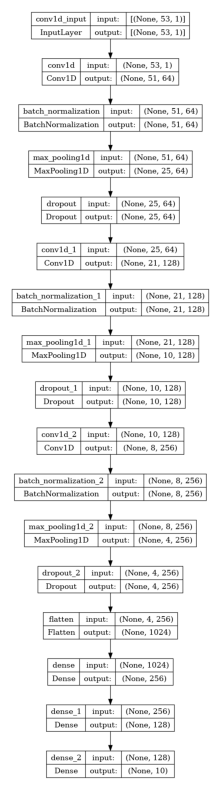

In [46]:
from matplotlib import pyplot as plt
from keras.utils.vis_utils import plot_model

# Visualize the model in a graph format
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

# Display the image in jupyter notebook
img = plt.imread('model_plot.png')
plt.figure(figsize=(10,10))
plt.imshow(img)
plt.axis('off')
plt.show()


In [47]:
# ann_viz(model,title='CNN model')

In [48]:
# graph_source=Source.form_file('network.gv')

In [49]:
# graph_source

In [50]:
# graph_source.source

In [51]:
# !pip install pydot

In [52]:
# !pip install tensorboard

In [53]:
# %load_ext tensorboard

In [54]:
# log_folder="logs"

In [55]:
# from tensorflow.keras.callbacks import TensorBoard
# callbacks=TensorBoard(log_dir=log_folder,histogram_freq=1)

In [56]:
# model.fit(X_train_reshaped, y_train_categorical, epochs=55, batch_size=64, validation_data=(X_test_reshaped, y_test_categorical), verbose=1,callbacks=callbacks)


In [57]:
# %tensorboard --logdir={log_folder}

In [58]:
# from ann_visualizer.visualize import ann_viz
# ann_viz(model,filename='cnn_modell.gv')

In [59]:
# import pandas as pd

# data = {
#     'Precision' : [0.85, 0.90, 0.80, 0.85, 0.93, 0.86, 0.93, 0.84, 0.88, 0.85],
#     'Recall' : [0.91, 0.98, 0.75, 0.85, 0.84, 0.86, 0.92, 0.93, 0.90, 0.77],
#     'F1-score' : [0.88, 0.93, 0.77, 0.85, 0.89, 0.86, 0.93, 0.89, 0.89, 0.81],
#     'Support' : [208, 203, 186, 199, 218, 192, 204, 180, 211, 197]
# }

# df = pd.DataFrame(data, index = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
# print(df)


In [60]:
...
# equivalent to: model.save("model.h5")
from tensorflow.keras.models import save_model
save_model(model, "model.h5")

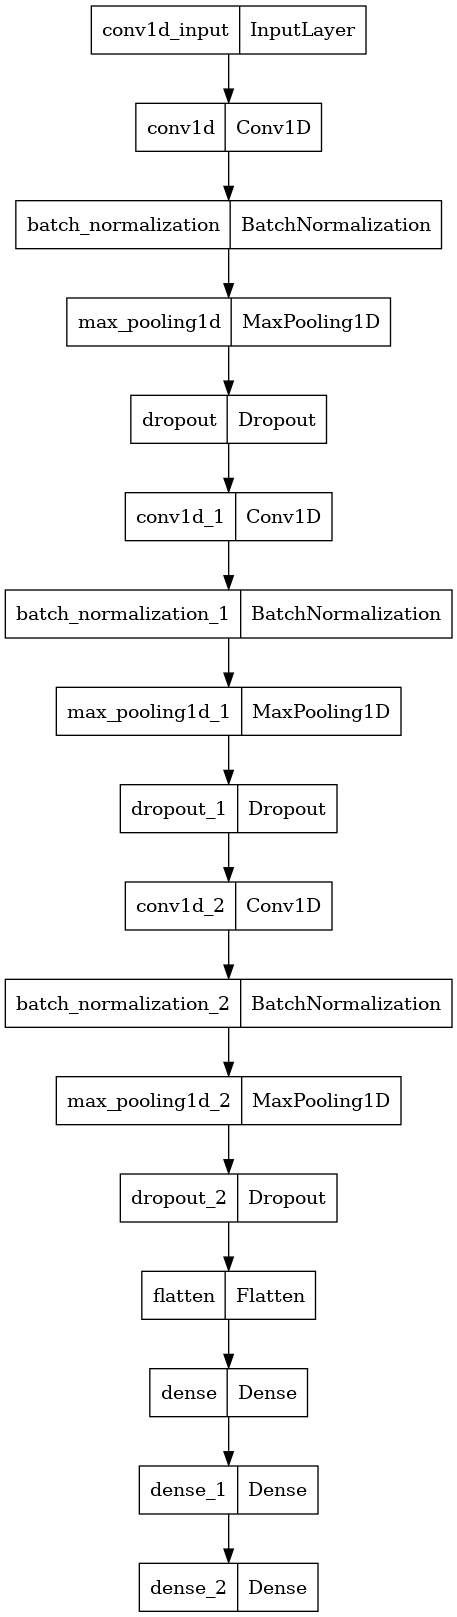

In [61]:
tf.keras.utils.plot_model(
    model,
    to_file="model.png",
    show_shapes=False,
    show_dtype=False,
    show_layer_names=True,
    rankdir="TB",
    expand_nested=False,
    dpi=96,
    layer_range=None,
    show_layer_activations=False,
    show_trainable=False,
)

In [62]:
print(y_pred)
print(y_test_encoded)
print(y_pred_classes)

[[4.3132454e-06 3.8403948e-17 9.0489829e-12 ... 4.2142341e-15
  1.5231064e-01 2.5821179e-10]
 [7.7056015e-09 9.1866177e-09 3.3708464e-08 ... 2.4572532e-11
  6.7026190e-11 5.2002319e-10]
 [5.0518155e-02 8.7932266e-14 7.9528627e-07 ... 7.7105694e-14
  2.4271067e-08 7.0010293e-07]
 ...
 [3.5676976e-08 5.4697485e-13 4.9733342e-09 ... 7.6435869e-10
  5.3852312e-07 8.3098843e-09]
 [1.9488418e-10 1.2319558e-15 9.3326093e-12 ... 9.9443531e-15
  8.9022648e-03 5.4666011e-06]
 [2.1220256e-10 1.5797640e-14 2.3686118e-08 ... 6.9794860e-12
  9.9999583e-01 5.3993498e-12]]
[4 5 0 ... 4 3 8]
[4 5 3 ... 4 3 8]


In [63]:
from tensorflow.keras.models import load_model
model = load_model("/kaggle/input/modelssx/model (1).h5")

In [64]:
# Training the model
history=model.fit(X_train_reshaped, y_train_categorical, epochs=55, batch_size=64, validation_data=(X_test_reshaped, y_test_categorical), verbose=1)

# prediction on the test set
y_pred = model.predict(X_test_reshaped)
y_pred_classes = np.argmax(y_pred, axis=1)

# Calculate metrics
report = classification_report(y_test_encoded, y_pred_classes, target_names=encoderr.classes_.astype(str))
# print(report)

Epoch 1/55
125/125 [==============================] - 4s 23ms/step - loss: 0.0748 - accuracy: 0.9752 - val_loss: 0.4089 - val_accuracy: 0.9064
Epoch 2/55
125/125 [==============================] - 3s 22ms/step - loss: 0.0691 - accuracy: 0.9761 - val_loss: 0.3762 - val_accuracy: 0.9169
Epoch 3/55
125/125 [==============================] - 3s 21ms/step - loss: 0.0726 - accuracy: 0.9746 - val_loss: 0.4282 - val_accuracy: 0.9109
Epoch 4/55
125/125 [==============================] - 3s 20ms/step - loss: 0.0783 - accuracy: 0.9733 - val_loss: 0.4114 - val_accuracy: 0.9194
Epoch 5/55
125/125 [==============================] - 2s 20ms/step - loss: 0.0773 - accuracy: 0.9745 - val_loss: 0.4011 - val_accuracy: 0.9084
Epoch 6/55
125/125 [==============================] - 2s 20ms/step - loss: 0.0571 - accuracy: 0.9807 - val_loss: 0.3827 - val_accuracy: 0.9129
Epoch 7/55
125/125 [==============================] - 3s 20ms/step - loss: 0.0740 - accuracy: 0.9761 - val_loss: 0.3986 - val_accuracy: 0.9129

In [65]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_3 (Conv1D)           (None, 51, 64)            256       
                                                                 
 batch_normalization (BatchN  (None, 51, 64)           256       
 ormalization)                                                   
                                                                 
 max_pooling1d_3 (MaxPooling  (None, 25, 64)           0         
 1D)                                                             
                                                                 
 dropout_3 (Dropout)         (None, 25, 64)            0         
                                                                 
 conv1d_4 (Conv1D)           (None, 21, 128)           41088     
                                                                 
 batch_normalization_1 (Batc  (None, 21, 128)         

In [66]:
print(report)

              precision    recall  f1-score   support

           0       0.94      0.92      0.93       208
           1       0.94      0.97      0.95       203
           2       0.91      0.80      0.85       186
           3       0.88      0.93      0.90       199
           4       0.96      0.87      0.91       218
           5       0.86      0.93      0.90       192
           6       0.89      0.99      0.94       204
           7       0.94      0.96      0.95       180
           8       0.92      0.91      0.92       211
           9       0.89      0.84      0.87       197

    accuracy                           0.91      1998
   macro avg       0.91      0.91      0.91      1998
weighted avg       0.91      0.91      0.91      1998



In [67]:
!pip install statsmodels

In [68]:
import statsmodels.api as sm
# Assuming 'y' is your dependent variable and 'X' is your independent variable(s)
model = sm.OLS(y, X).fit()
print(model.summary())


                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.081
Model:                            OLS   Adj. R-squared (uncentered):              0.076
Method:                 Least Squares   F-statistic:                              16.44
Date:                Fri, 09 Feb 2024   Prob (F-statistic):                   1.32e-141
Time:                        19:58:15   Log-Likelihood:                         -30489.
No. Observations:                9990   AIC:                                  6.108e+04
Df Residuals:                    9937   BIC:                                  6.147e+04
Df Model:                          53                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

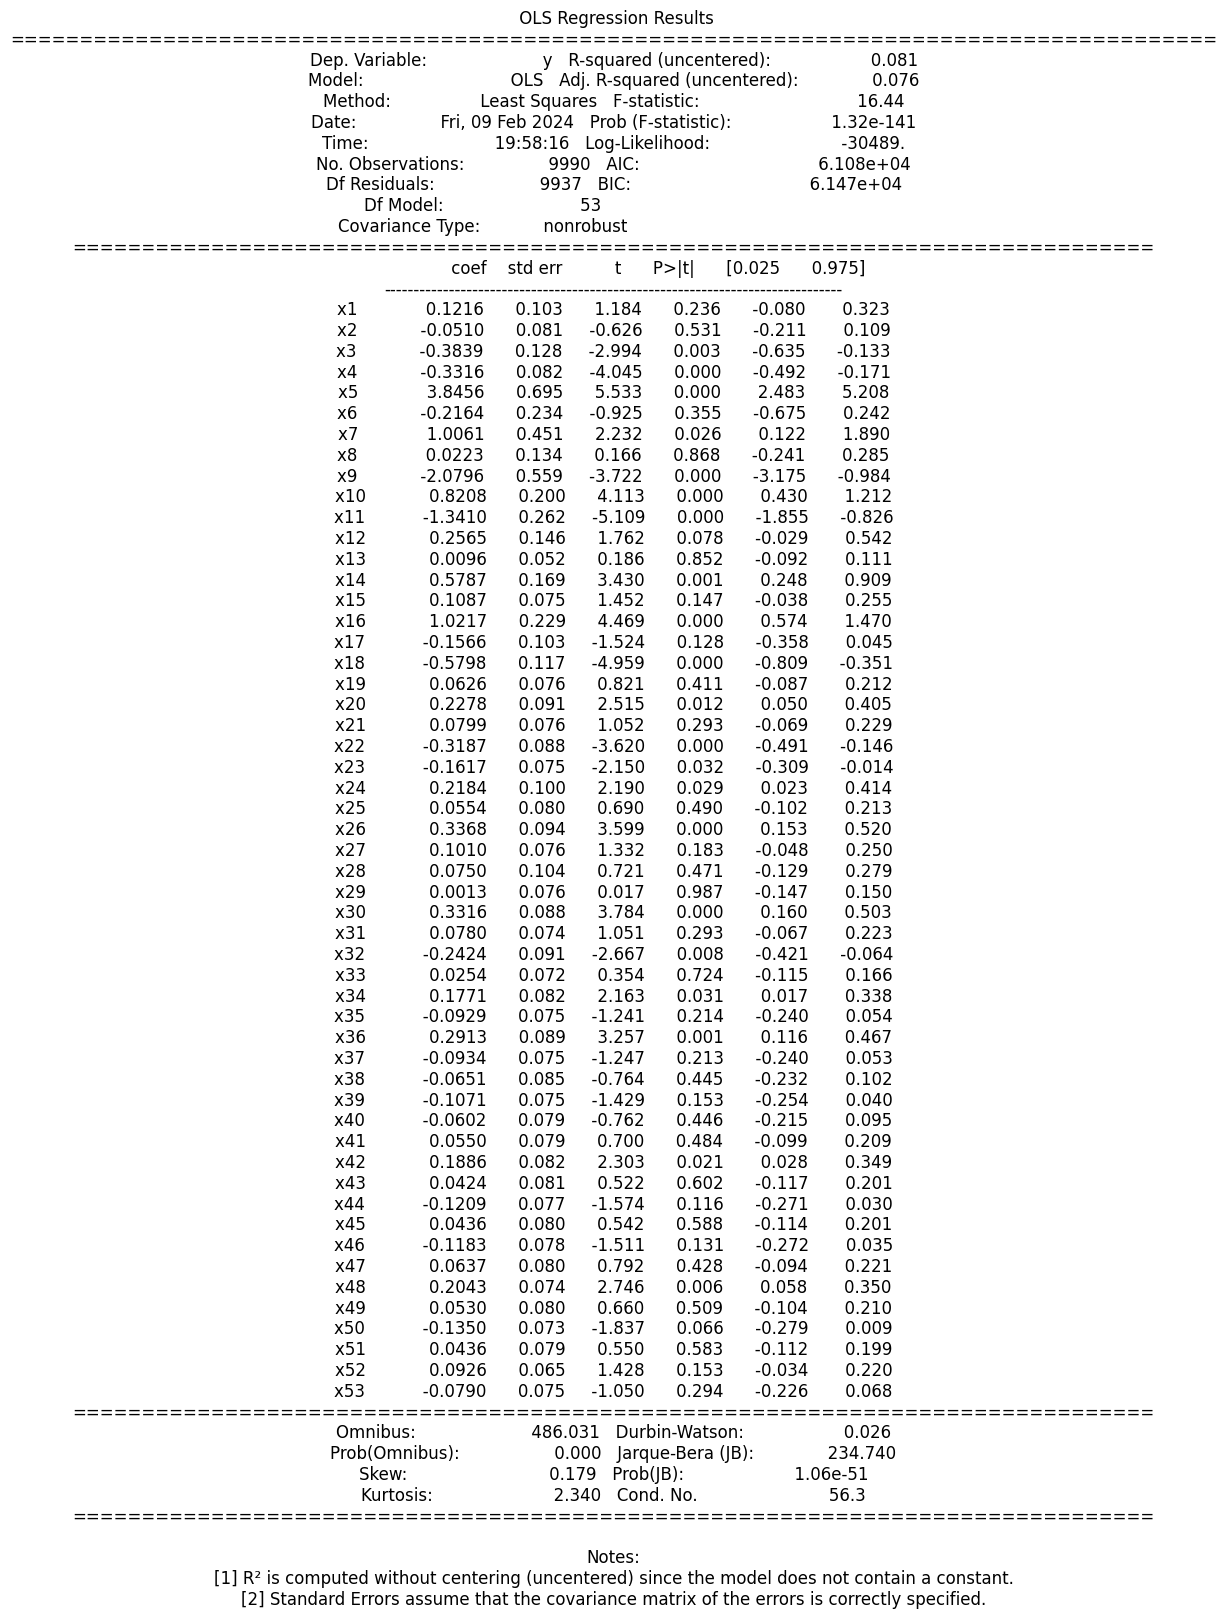

In [69]:
import matplotlib.pyplot as plt

# Get the string representation of the model summary
summary_str = str(model.summary())

fig, ax = plt.subplots(figsize=(12, 8))  # Adjust as needed

# Add the summary string as text on the plot
ax.text(0.5, 0.5, summary_str,
        horizontalalignment='center',
        verticalalignment='center',
        fontsize=12, color='black',
        transform=ax.transAxes)

# Hide the axes
ax.axis('off')

# Save the figure
plt.savefig('model_summary.png')


<Figure size 640x480 with 0 Axes>

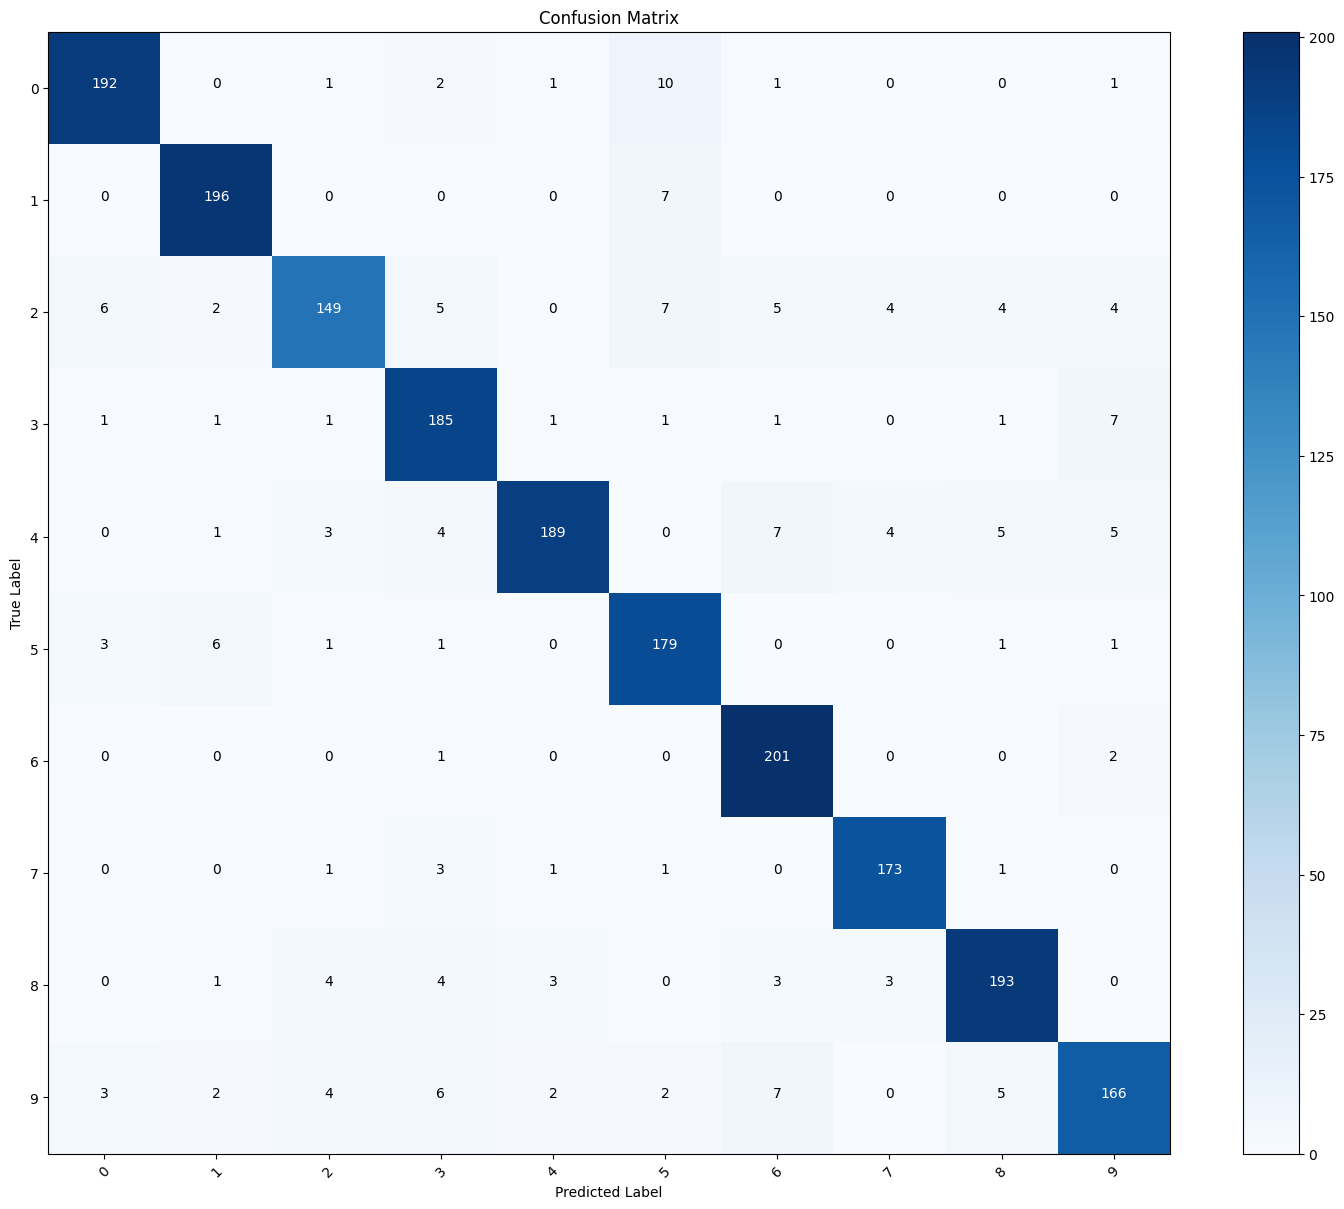

In [70]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Generate confusion matrix
cm= confusion_matrix(y_test_encoded, y_pred_classes)

import itertools
plt.clf()
fig = plt.figure(figsize = (15,12)) 
ax = fig.add_subplot(111)
ax.set_aspect(1)
plt.imshow(cm, cmap = plt.cm.Blues, interpolation='nearest')

plt.title("Confusion Matrix")
plt.colorbar()
tick_marks = np.arange(len(range(10)))
plt.xticks(tick_marks, range(10), rotation=45)
plt.yticks(tick_marks, range(10))
thresh = cm.max()/2
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i , cm[i,j], horizontalalignment="center", color="white" if cm[i,j]>thresh else "black")

plt.tight_layout()
plt.ylabel("True Label")
plt.xlabel("Predicted Label")
plt.savefig('con_matrix_CNN_GTZAN.png')

<Figure size 640x480 with 0 Axes>

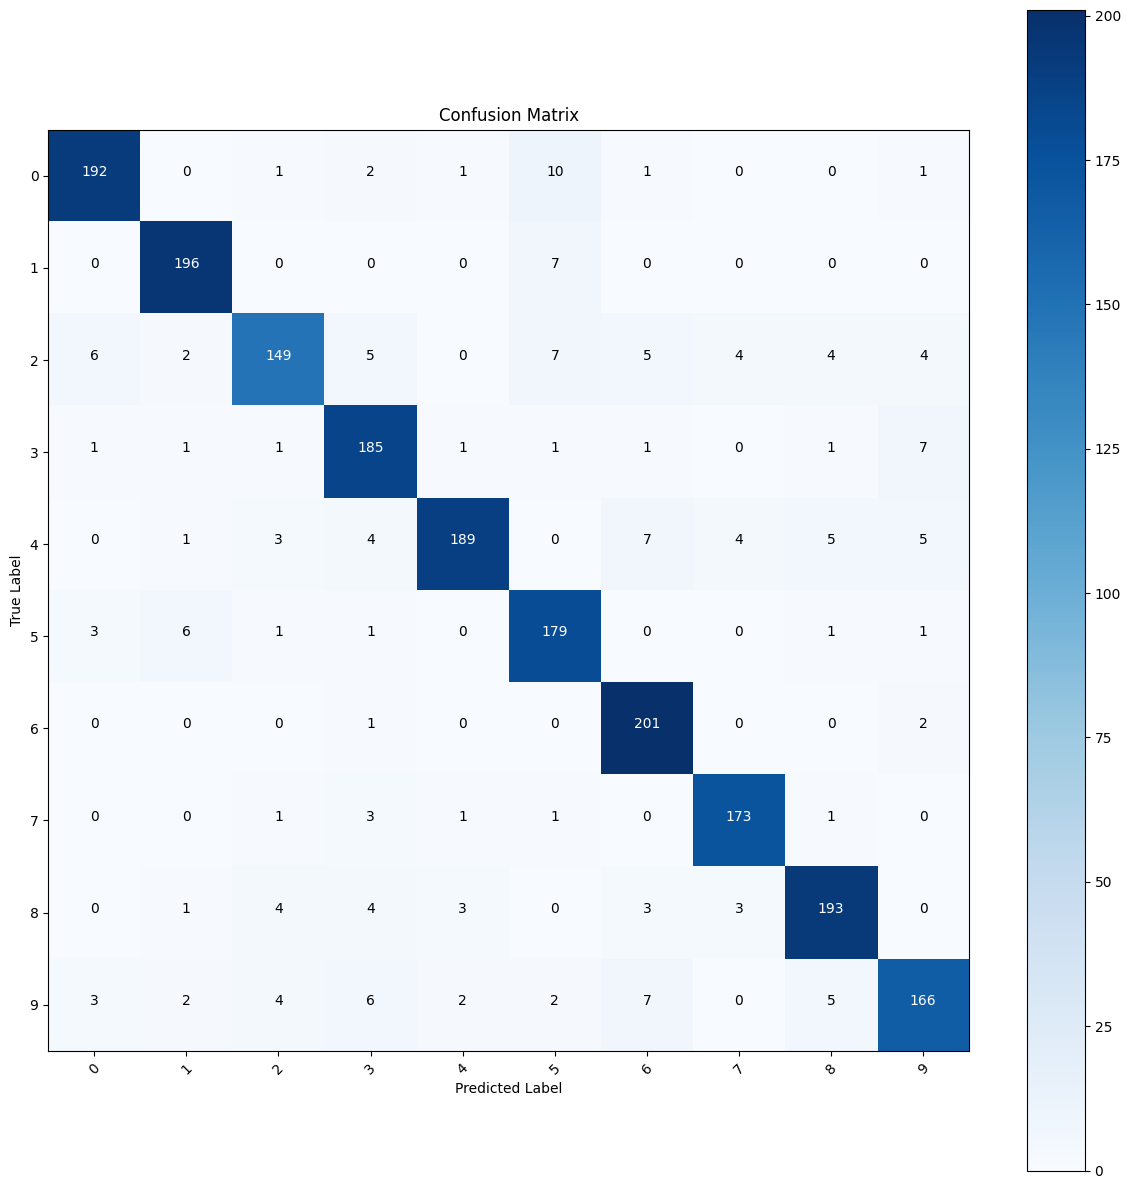

In [71]:
from sklearn.metrics import confusion_matrix
# cm = confusion_matrix(y_pred_classes, y_true,)
cm= confusion_matrix(y_test_encoded, y_pred_classes)

import itertools
plt.clf()
fig = plt.figure(figsize = (12,12)) 
ax = fig.add_subplot(111)
ax.set_aspect(1)
plt.imshow(cm, cmap = plt.cm.Blues, interpolation='nearest')

plt.title("Confusion Matrix")
plt.colorbar()
tick_marks = np.arange(len(range(10)))
plt.xticks(tick_marks, range(10), rotation=45)
plt.yticks(tick_marks, range(10))
thresh = cm.max()/2
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i , cm[i,j], horizontalalignment="center", color="white" if cm[i,j]>thresh else "black")

plt.tight_layout()
plt.ylabel("True Label")
plt.xlabel("Predicted Label")
plt.savefig('con_matrix_LSTM_GTZAN.png')

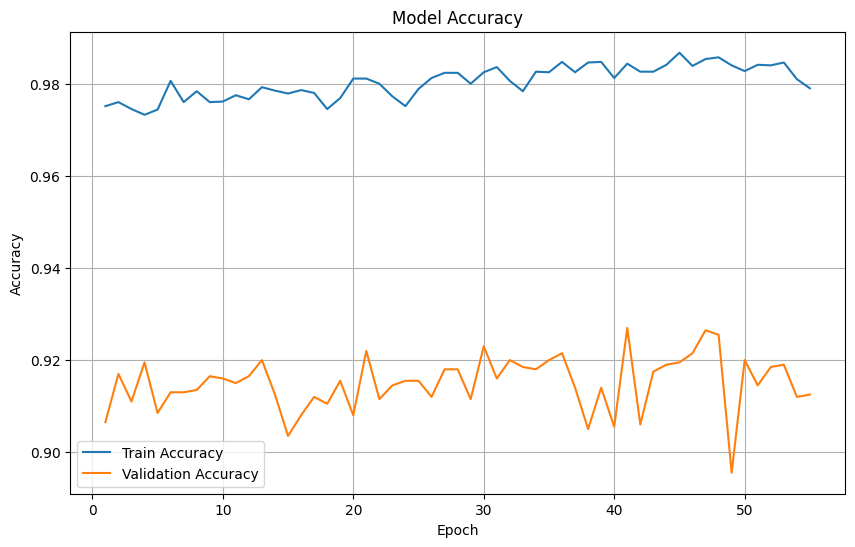

<Figure size 640x480 with 0 Axes>

In [72]:
import matplotlib.pyplot as plt

# Extract accuracy values from model history
accuracy_history = history.history['accuracy']
val_accuracy_history = history.history['val_accuracy']

# Create the plot
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(accuracy_history) + 1), accuracy_history, label='Train Accuracy')
plt.plot(range(1, len(val_accuracy_history) + 1), val_accuracy_history, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Model Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# Optionally, you can save the plot as an image
plt.tight_layout()
plt.savefig('modell_accuracy.png')


In [73]:
import plotly.graph_objects as go

# Extract accuracy values from model history
accuracy_history = history.history['accuracy']
val_accuracy_history = history.history['val_accuracy']

# Create the plot
fig = go.Figure()

fig.add_trace(go.Scatter(
    x=list(range(1, len(accuracy_history) + 1)),
    y=accuracy_history,
    mode='lines',
    name='Train Accuracy'
))

fig.add_trace(go.Scatter(
    x=list(range(1, len(val_accuracy_history) + 1)),
    y=val_accuracy_history,
    mode='lines',
    name='Validation Accuracy'
))

fig.update_layout(
    title='Model Accuracy',
    xaxis=dict(title='Epoch'),
    yaxis=dict(title='Accuracy'),
)

fig.show()


In [74]:
import plotly.graph_objects as go

# Extract accuracy values from model history
accuracy_history = history.history['loss']
val_accuracy_history = history.history['val_loss']

# Create the plot
fig = go.Figure()

fig.add_trace(go.Scatter(
    x=list(range(1, len(accuracy_history) + 1)),
    y=accuracy_history,
    mode='lines',
    name='Train Loss'
))

fig.add_trace(go.Scatter(
    x=list(range(1, len(val_accuracy_history) + 1)),
    y=val_accuracy_history,
    mode='lines',
    name='Validation Loss'
))

fig.update_layout(
    title='Model Loss',
    xaxis=dict(title='Epoch'),
    yaxis=dict(title='Loss'),
)

fig.show()


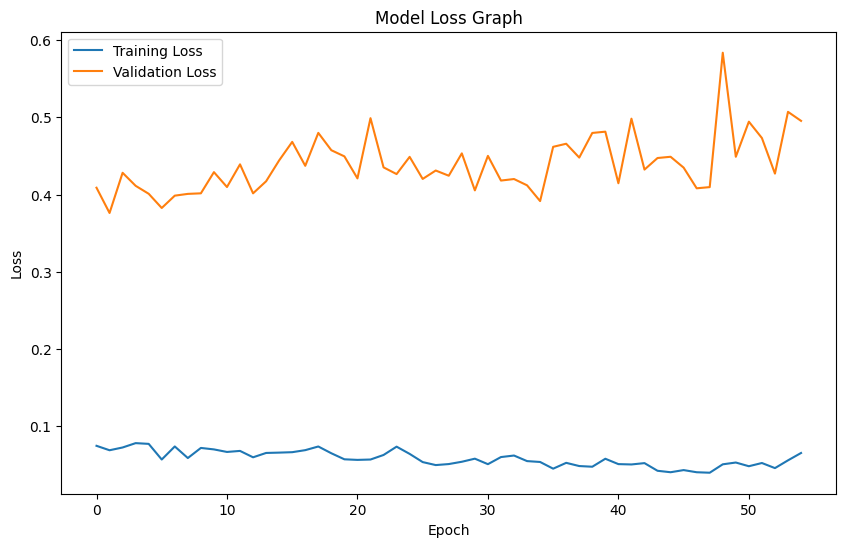

<Figure size 640x480 with 0 Axes>

In [75]:
import matplotlib.pyplot as plt

# Extract training and validation losses from history
train_loss = history.history['loss']
val_loss = history.history['val_loss']

# Generate the plot
plt.figure(figsize=(10, 6))
plt.plot(train_loss, label="Training Loss")
plt.plot(val_loss, label="Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.grid(False)
plt.title("Model Loss Graph")
plt.show()

# Optionally, save the plot as an image
plt.savefig("model_loss_graph.jpg")


In [76]:
import plotly.graph_objects as go

labels = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']
precision = [0.95, 0.96, 0.85, 0.85, 0.93, 0.89, 0.93, 0.91, 0.91, 0.93]
recall = [0.89, 0.98, 0.86, 0.90, 0.90, 0.95, 0.99, 0.98, 0.91, 0.77]
f1_score = [0.92, 0.97, 0.86, 0.88, 0.92, 0.92, 0.96, 0.95, 0.91, 0.84]

x = np.arange(len(labels))  # the label locations
width = 0.3  # the width of the bars

fig = go.Figure()

fig.add_trace(go.Bar(
    x=labels,
    y=precision,
    name='Precision',
    width=width,
    offset=-width
))

fig.add_trace(go.Bar(
    x=labels,
    y=recall,
    name='Recall',
    width=width
))

fig.add_trace(go.Bar(
    x=labels,
    y=f1_score,
    name='F1_score',
    width=width,
    offset=width
))

fig.update_layout(
    barmode='group',
#     title='Epoch wise Scores(Precision,Recall,F1_score)',
    xaxis_title='Epochs',
    yaxis_title='Scores'
)

fig.show()


In [77]:
# evaluate the model
_, train_acc = model.evaluate(X_train_reshaped, y_train_categorical, verbose=0)
_, test_acc = model.evaluate(X_test_reshaped, y_test_categorical, verbose=0)

AttributeError: 'OLSResults' object has no attribute 'evaluate'

In [ ]:
test_acc

In [ ]:
train_acc

In [ ]:
# from sklearn.metrics import confusion_matrix
# y_pred=np.argmax(y_pred)
# y_test_categorical=np.argmax(y_test_categorical, axis=1)
# r = confusion_matrix(y_test_categorical, y_pred)

# r = numpy.flip(r)

# acc = (r[0][0] + r[-1][-1]) / numpy.sum(r)
# print(acc)

In [ ]:
# plot loss during training
plt.subplot(211)
plt.title('Loss during trainig ')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()
# print("\n")
# plot accuracy during training
plt.subplot(212)
plt.title('Accuracy during trainig ')
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.legend()
plt.show()

In [ ]:
# from sklearn.metrics import accuracy_score
# acc = accuracy_score(y_test_categorical, y_pred)

In [ ]:
# predict probabilities for test set
yhat_probs = model.predict(X_test_reshaped, verbose=0)
# predict crisp classes for test set
# yhat_classes = model.predict_classes(X_test_reshaped, verbose=0)
predict_x=model.predict(X_test_reshaped)
yhat_classes=np.argmax(predict_x,axis=1)
# yhat_classes = np.argmax(model.predict(X_test_reshaped),axis=-1)
# yhat_classes=np.argmax(model.predict(X_test_reshaped), axis=-1)

In [ ]:
print(yhat_classes)
print(yhat_probs)

In [ ]:
# y_test_arg=np.argmax(y_test_categorical)
# Y_pred = np.argmax(model.predict(X_test_reshaped),axis=1)
# print('Confusion Matrix')
# print(confusion_matrix(y_test_arg, Y_pred))

In [ ]:
# # reduce to 1d array
# # yhat_probs = yhat_probs[:, 0]
# # yhat_classes = yhat_classes[:, 0]
 
# # accuracy: (tp + tn) / (p + n)
# accuracy = multilabel_accuracy_score(y_test_categorical, yhat_classes)
# print('Accuracy: %f' % accuracy)
# # precision tp / (tp + fp)
# precision = precision_score(y_test_categorical, yhat_classes)
# print('Precision: %f' % precision)
# # recall: tp / (tp + fn)
# recall = recall_score(y_test_categorical, yhat_classes)
# print('Recall: %f' % recall)
# # f1: 2 tp / (2 tp + fp + fn)
# f1 = f1_score(y_test_categorical, yhat_classes)
# print('F1 score: %f' % f1)
 
# # kappa
# kappa = cohen_kappa_score(y_test_categorical, yhat_classes)
# print('Cohens kappa: %f' % kappa)
# # ROC AUC
# auc = roc_auc_score(y_test_categorical, yhat_probs)
# print('ROC AUC: %f' % auc)
# # confusion matrix
# matrix = confusion_matrix(y_test_categorical, yhat_classes)
# print(matrix)

In [ ]:
# # multilayer perceptron model for the two circles problem
# from sklearn.datasets import make_circles
# from keras.models import Sequential
# from keras.layers import Dense
# from matplotlib import pyplot
# # generate dataset
# X, y = make_circles(n_samples=1000, noise=0.1, random_state=1)
# # split into train and test
# n_test = 500
# trainX, testX = X[:n_test, :], X[n_test:, :]
# trainy, testy = y[:n_test], y[n_test:]
# # define model
# model = Sequential()
# model.add(Dense(100, input_shape=(2,), activation='relu'))
# model.add(Dense(1, activation='sigmoid'))
# # compile model
# model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# # fit model
# history = model.fit(trainX, trainy, validation_data=(testX, testy), epochs=300, verbose=0)
# # evaluate the model
# _, train_acc = model.evaluate(trainX, trainy, verbose=0)
# _, test_acc = model.evaluate(testX, testy, verbose=0)
# print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))
# # plot loss during training
# pyplot.subplot(211)
# pyplot.title('Loss')
# pyplot.plot(history.history['loss'], label='train')
# pyplot.plot(history.history['val_loss'], label='test')
# pyplot.legend()
# # plot accuracy during training
# pyplot.subplot(212)
# pyplot.title('Accuracy')
# pyplot.plot(history.history['accuracy'], label='train')
# pyplot.plot(history.history['val_accuracy'], label='test')
# pyplot.legend()
# pyplot.show()

In [ ]:
len(X_train[0])

In [ ]:
import plotly.graph_objects as go

models = ['KNN', 'CNN', 'Random Forest', 'SVM']
accuracy_scores = [0.685, 0.87, 0.68, 0.75]

fig = go.Figure([go.Bar(x=models, y=accuracy_scores)])
fig.update_layout(title='Accuracy Scores of Different Models',
                  xaxis_title='Models',
                  yaxis_title='Accuracy Scores')
fig.show()



In [ ]:
import plotly.graph_objects as go

models = ['KNN', 'CNN', 'Random Forest', 'SVM',"RNN(LSTM)"]
accuracy_scores = [0.685, 0.87, 0.68,0.75,0.82]

fig = go.Figure(data=[go.Bar(
    x=models, y=accuracy_scores,
    text=accuracy_scores,
    textposition='auto',
)])

fig.update_layout(title='Accuracy Scores of Different Models',
                  xaxis_title='Models',
                  yaxis_title='Accuracy Scores')

fig.show()


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Wyniki dokładności dla każdego modelu
models = ['KNN', 'CNN', 'Random Forest',"SVM"]
accuracy_scores = [0.685, 0.87, 0.68,0.75]  # Przykładowe wyniki dokładności dla każdego modelu

# Tworzenie wykresu
plt.figure(figsize=(10, 6))
plt.bar(models, accuracy_scores, color=['blue', 'green', 'red','yellow'])
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Comparison of Model Accuracies')
plt.ylim(0, 1)
plt.show()

In [ ]:
# knn.save("/kaggle/working/KNN.hdf5")

# save model with joblib 
filename = '/kaggle/working/KNN.hdf5'
joblib.dump(knn, filename)

In [ ]:
import numpy as np
import librosa

def extract_features(song):
    import librosa
    y, sr = librosa.load(song, mono=True, duration=500)
    chroma_stft = librosa.feature.chroma_stft(y=y, sr=sr)
    rms = librosa.feature.rms(y=y)
    spec_cent = librosa.feature.spectral_centroid(y=y, sr=sr)
    spec_bw = librosa.feature.spectral_bandwidth(y=y, sr=sr)
    rolloff = librosa.feature.spectral_rolloff(y=y, sr=sr)
    zcr = librosa.feature.zero_crossing_rate(y)
    mfcc = librosa.feature.mfcc(y=y, sr=sr)
    feature_dict = {
        
        'chroma_stft_mean': np.mean(chroma_stft),
        'chroma_stft_var': np.var(chroma_stft),
        'rms_mean': np.mean(rms),
        'rms_var': np.var(rms),
        'spectral_centroid_mean': np.mean(spec_cent),
        'spectral_centroid_var': np.var(spec_cent),
        'spectral_bandwidth_mean': np.mean(spec_bw),
        'spectral_bandwidth_var': np.var(spec_bw),
        'rolloff_mean': np.mean(rolloff),
        'rolloff_var': np.var(rolloff),
        'zero_crossing_rate_mean': np.mean(zcr),
        'zero_crossing_rate_var': np.var(zcr),
        # 'harmony_mean': ..., # Not standard, requires additional context.
        # 'harmony_var': ..., # Not standard, requires additional context.
        # 'perceptr_mean': ..., # Not standard, requires additional context.
        # 'perceptr_var': ..., # Not standard, requires additional context.
        'tempo': librosa.feature.tempo(y=y, sr=sr)[0],
        
    }
    
    for i in range(1, 21): # For each of 20 MFCCs
        feature_dict[f'mfcc{i}_mean'] = np.mean(mfcc[i-1])
        feature_dict[f'mfcc{i}_var'] = np.var(mfcc[i-1])
    # 'label': ... # Requires additional context. 
    return list(feature_dict.values())


In [ ]:
# uploadfile="/kaggle/input/gtzan-dataset-music-genre-classification/Data/genres_original/blues/blues.00006.wav"
# meta = extract_features(uploadfile)
# genre = predict_gen(meta)
# print(genre)

In [ ]:
a=extract_features("/kaggle/input/raggae/we-dub-a-long-way-instrumental-172796.wav")
b=extract_features('/kaggle/input/input-value/kitten-172244.wav')
c=extract_features('/kaggle/input/country/letx27s-rock-with-me-100-170813.wav')

In [ ]:
d=extract_features("/kaggle/input/rock-songs/hip-hop-rock-beats-118000.wav")
e=extract_features("/kaggle/input/rock-songs/sunshine-whistle-175139.wav")
f=extract_features("/kaggle/input/hhhhhhhhm/Bob-Marley-Three-Little-Birds-.wav")

In [ ]:
print(X_train_reshaped,"\n ugabuga")
# print(single_input_reshaped)

In [ ]:
X_train_reshaped.shape


# X_test_reshaped = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

In [ ]:
import numpy as np
input= np.array(f)

input=scaler.transform([input])

# Reshape the single input data
single_input_reshaped = input.reshape(1, input[0].shape[0], 1)

# Make the prediction using the prepared input
prediction = model.predict(single_input_reshaped)

# Get the predicted class
predicted_class = np.argmax(prediction)

# If you need the predicted class label
predicted_label = encoder.classes_[predicted_class]


In [ ]:
single_input_reshaped.shape

In [ ]:
print(predicted_label)
print(predicted_class)

In [ ]:
import pickle

pick1={
    'scaler':scaler,
#     'cnn':model,
    'encoder':encoder
}
pickle.dump(pick1,open("cnn_model"+".hdf5","wb"))

In [ ]:
len(a)

In [ ]:
#  Import pickle Package

import pickle

In [ ]:
# Save the Modle to file in the current working directory

Pkl_Filename = "/kaggle/input/models/models.p"  

# Load the Model back from file
with open(Pkl_Filename, 'rb') as file:  
    Pickled_LR_Model = pickle.load(file)

# Pickled_LR_Model

In [ ]:
le_name_mapping = dict(zip(encoder.classes_, encoder.transform(encoder.classes_)))
print(le_name_mapping)
# {'Tom': 0, 'Nick': 1, 'Kate': 2}

In [ ]:

# from sklearn.preprocessing import MinMaxScaler
# scaler = MinMaxScaler()
# Convert the dictionary to an array of values
# d1 = np.array(list(a.values()))
x=scaler.transform([e])
# Reshape this array to 2D since scaler requires 2D array as input
# d1 = np.reshape(d1, (1, -1))

# Scale our data using the fit_transform method 
# data1 = scaler.fit_transform(d1)
# p="/kaggle/input/models/models.p"
genre_prediction = knn.predict(x)

# genre_prediction = rf.predict(x)
# genre_prediction = Pickled_LR_Model.predict(data1)

# print(lookup_genre_name[genre_prediction[0]])
print(l[genre_prediction[0]])

In [ ]:
#one hot encoding 
# print(df)
fdf=pd.get_dummies(df,drop_first=True)
fdf
fdf['label_classical'] = fdf['label_classical'].astype(int)
fdf['label_rock'] = fdf['label_rock'].astype(int)
fdf['label_disco'] = fdf['label_disco'].astype(int)
fdf['label_hiphop'] = fdf['label_hiphop'].astype(int)
fdf['label_jazz'] = fdf['label_jazz'].astype(int)
fdf['label_metal'] = fdf['label_metal'].astype(int)
fdf['label_pop'] = fdf['label_pop'].astype(int)
fdf['label_reggae'] = fdf['label_reggae'].astype(int)
fdf['label_country'] = fdf['label_country'].astype(int)








fdf
# fdf.corr()

In [ ]:
# #Plotting a heatmap on the correlation values
# import seaborn as sns
# %matplotlib inline

# plt.figure(figsize=(6,3), dpi=150)
# sns.heatmap(fdf.corr(), annot=True)a
# plt.show()

In [ ]:
pd.get_dummies(df.label)

In [ ]:
# #Plotting a heatmap on the correlation values
# plt.figure(figsize=(6,3), dpi=150)
# sns.heatmap(fdf.corr(), annot=True)
# plt.show()